## EE 242 Lab 4a – Digital Filtering - Various Filters

Wheeler

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we will consider different types of digital filters (specifically discrete-time, linear, time-invariant filters) and look at their characterization in both time and frequency. This will give you some insight into how digital filters are implemented and into the properties of different digital filter design algorithms. You’ll also learn about some of the signal processing functions available from the signal module in the scipy package which will be useful for designing and implement filters.  You will work with examples that show you how filtering can be useful to remove noise and reshape the frequency content of a signal. Specifically, we’ll revisit the lab 2 problem of removing noise from signals (or smoothing signals), then explore filter design methods, and finally implement a simple audio equalizer. This is a 2-week lab. It is recommended to work on the first 2 assignments in the first week and the remaining 
assignments in the second week. 

## Lab 4a turn in checklist

•	Lab 4a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)

## Assignment 1 -- Different Filter Implementations

In this lab, we will be using standard tools to design filters, and we’ll want to view them in both the time and frequency domain. In this assignment, you will write and test functions for plotting the frequency response and the impulse response of a system given the filter coefficients {a, b}. This assignment will have three parts, A-C.

**A.** The response that is most often illustrated is the magnitude frequency response on a dB scale. Write a function that takes as input the filter coefficients, an optional flag for plotting both the magnitude and phase of the frequency response, and an optional sampling frequency. The function should generate either a plot of the magnitude or both the magnitude and the phase side-by-side, depending on the flag, with the default being magnitude only. The magnitude of the frequency response should be plotted on a dB scale with a range of [-100,0].  If no sampling frequency is provided, use radians for the frequency axis; otherwise use a Hz scale. 

**B.**  Write a second function that takes as input the filter coefficients and a desired impulse response length, computes and returns the impulse response, and also plots the impulse response using a stem plot.

**C.**  Test the functions by plotting the magnitude, phase and impulse responses of two lowpass filters with a frequency cut-off of 0.15. One should be an FIR filter designed using the signal.firwin function (order 20) and the other should be an IIR filter with the signal.butter function (order 10).


FIR Filter:


<IPython.core.display.Javascript object>


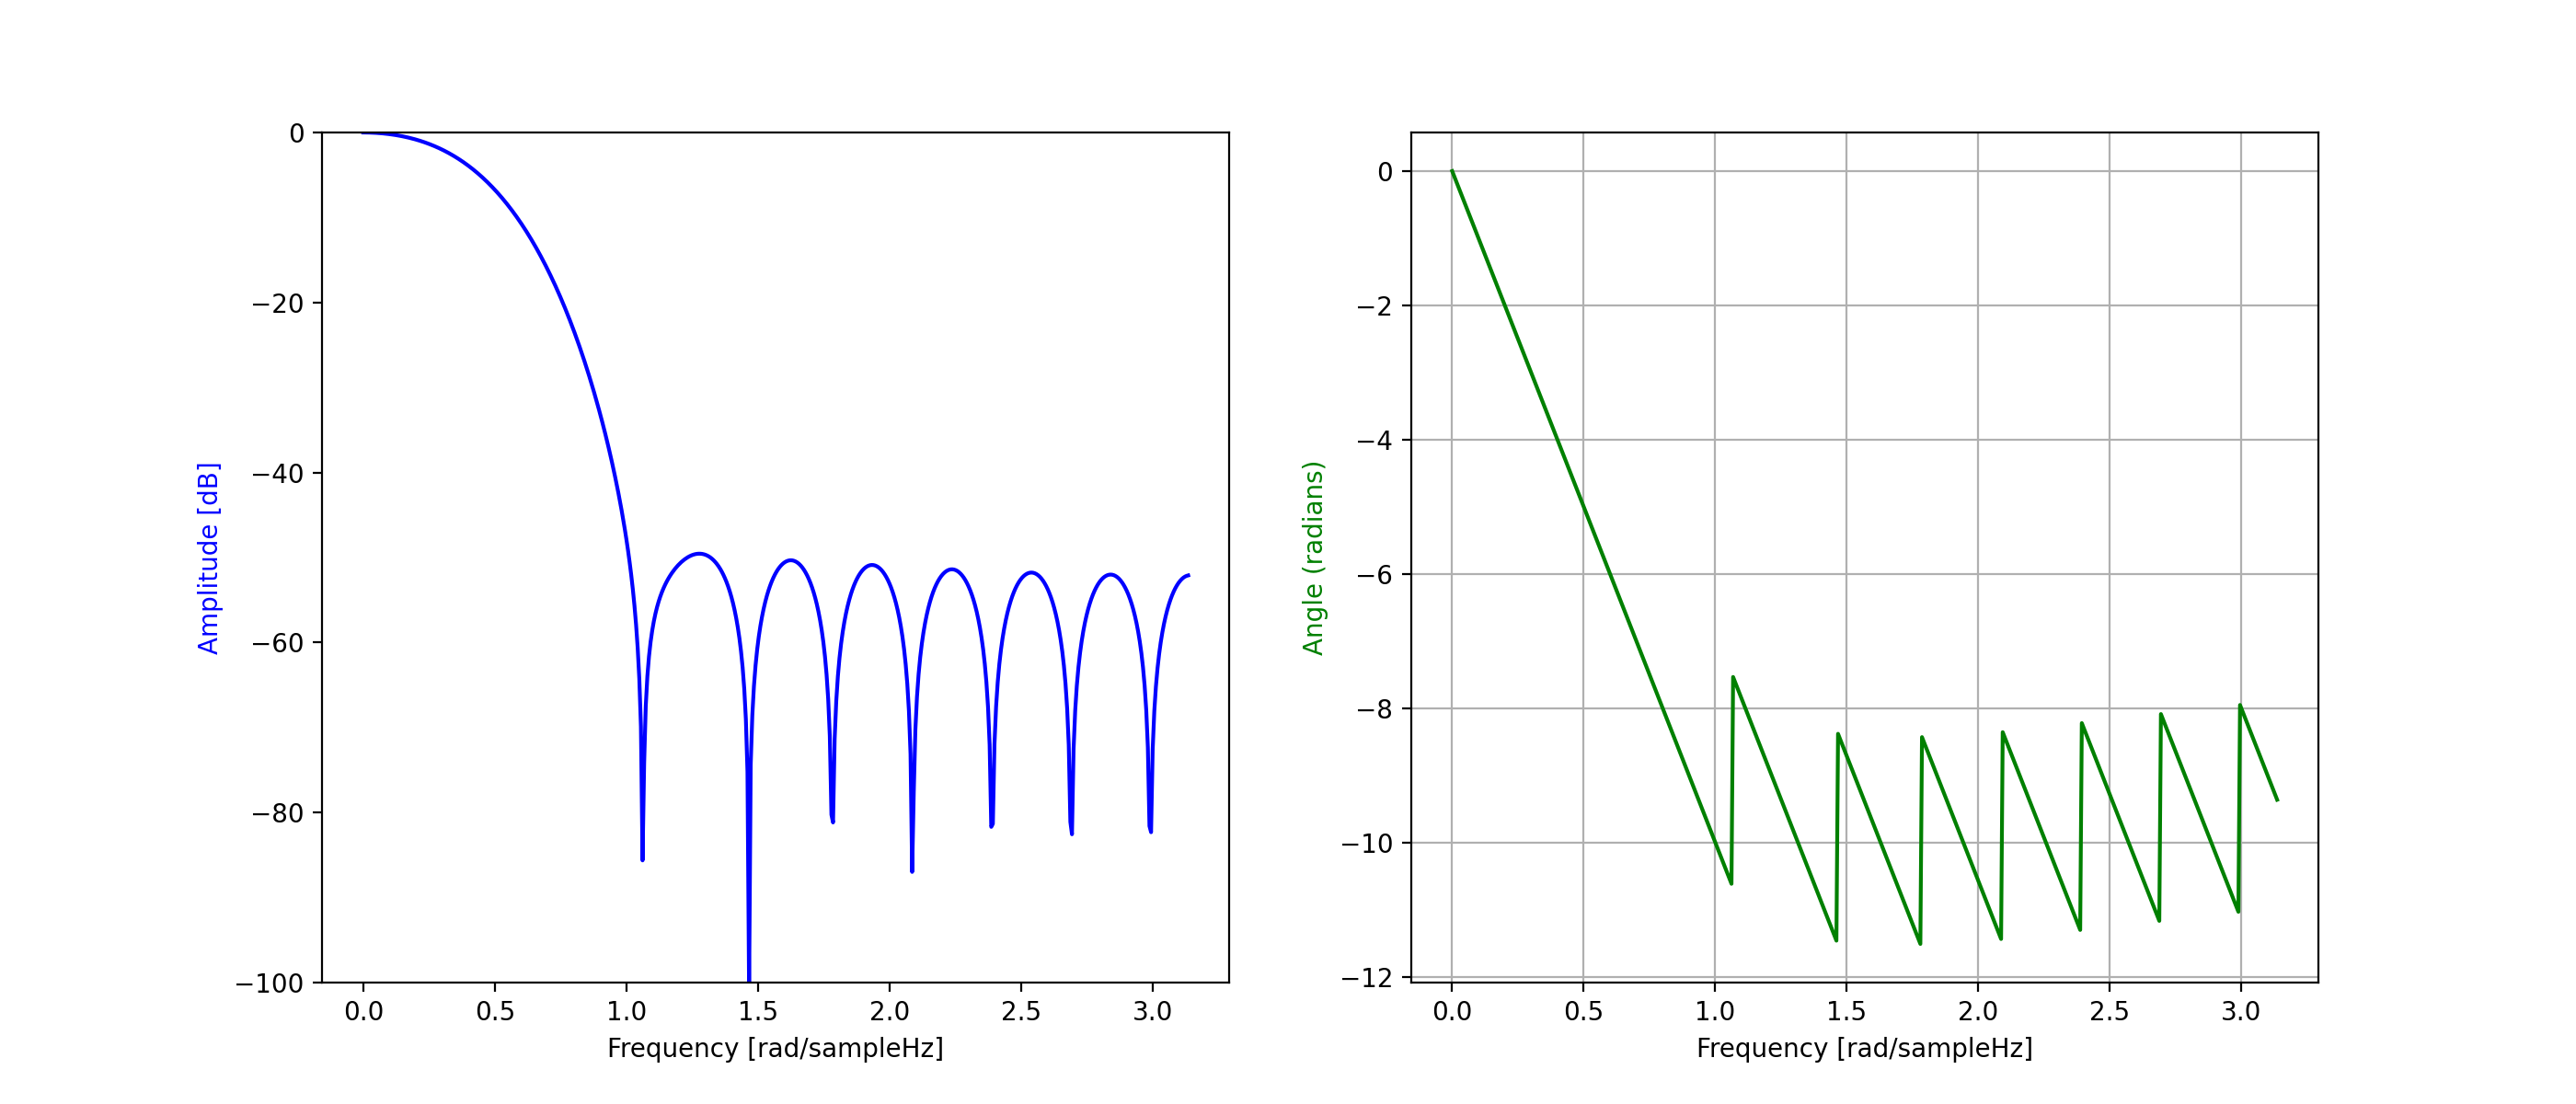

<IPython.core.display.Javascript object>


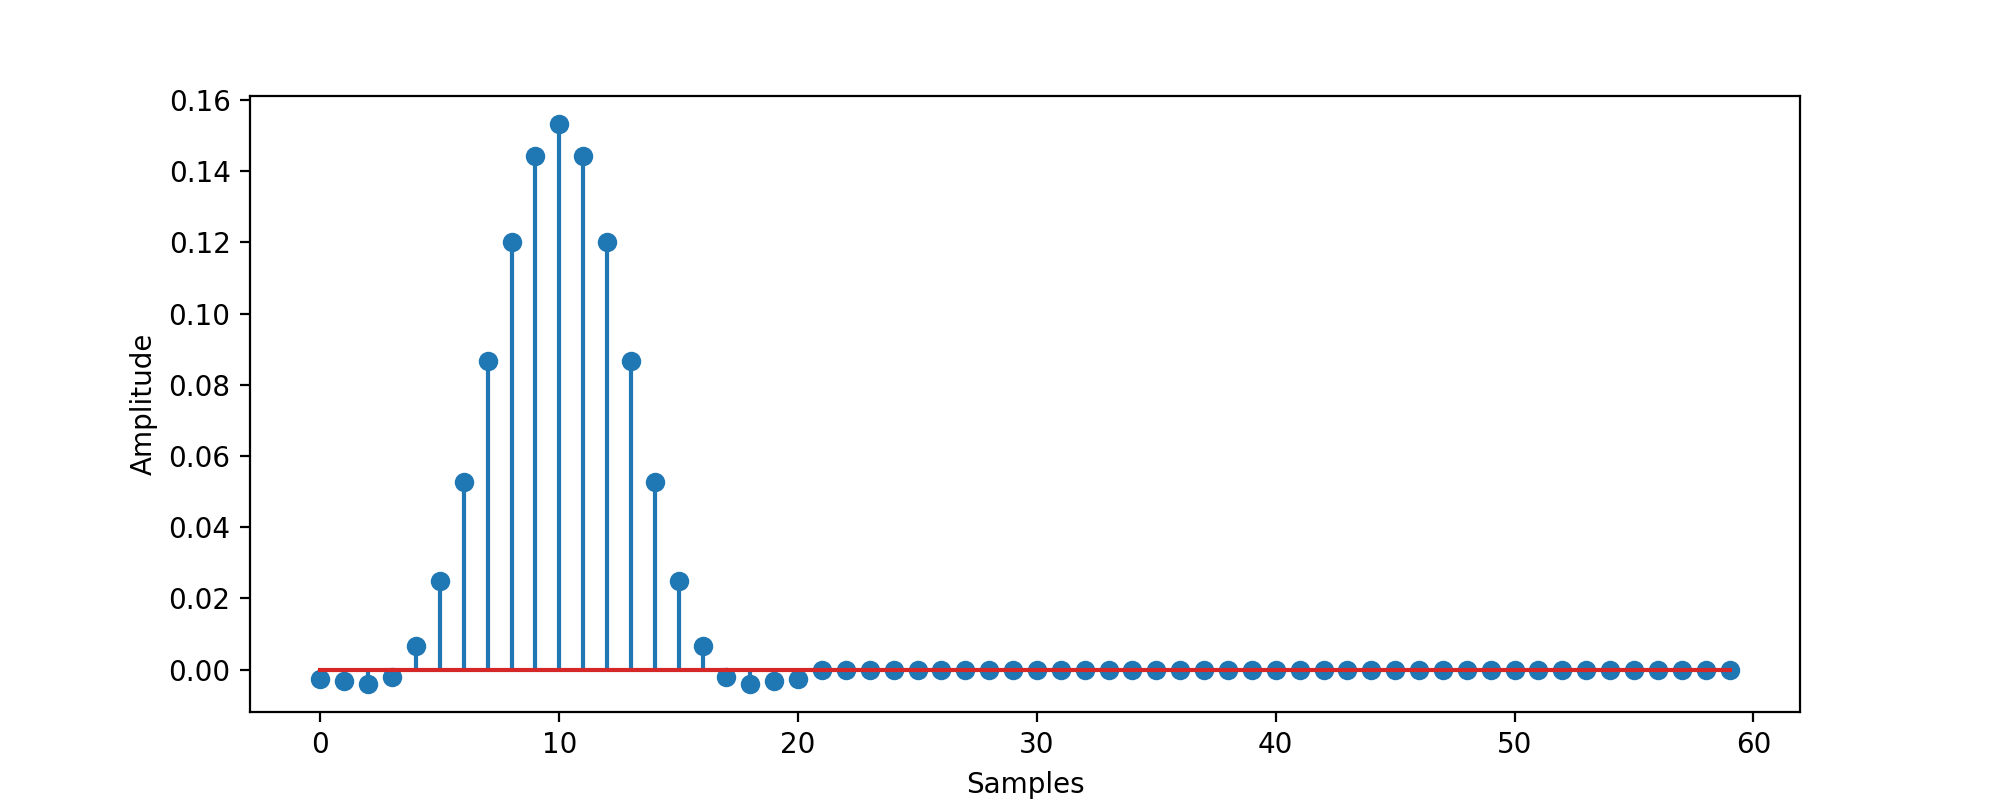


IIR Filter:


/var/folders/qz/cx605xfd6hg3dyw77ss7dhc80000gn/T/ipykernel_75542/1389457474.py:52: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, use_line_collection=True)


<IPython.core.display.Javascript object>


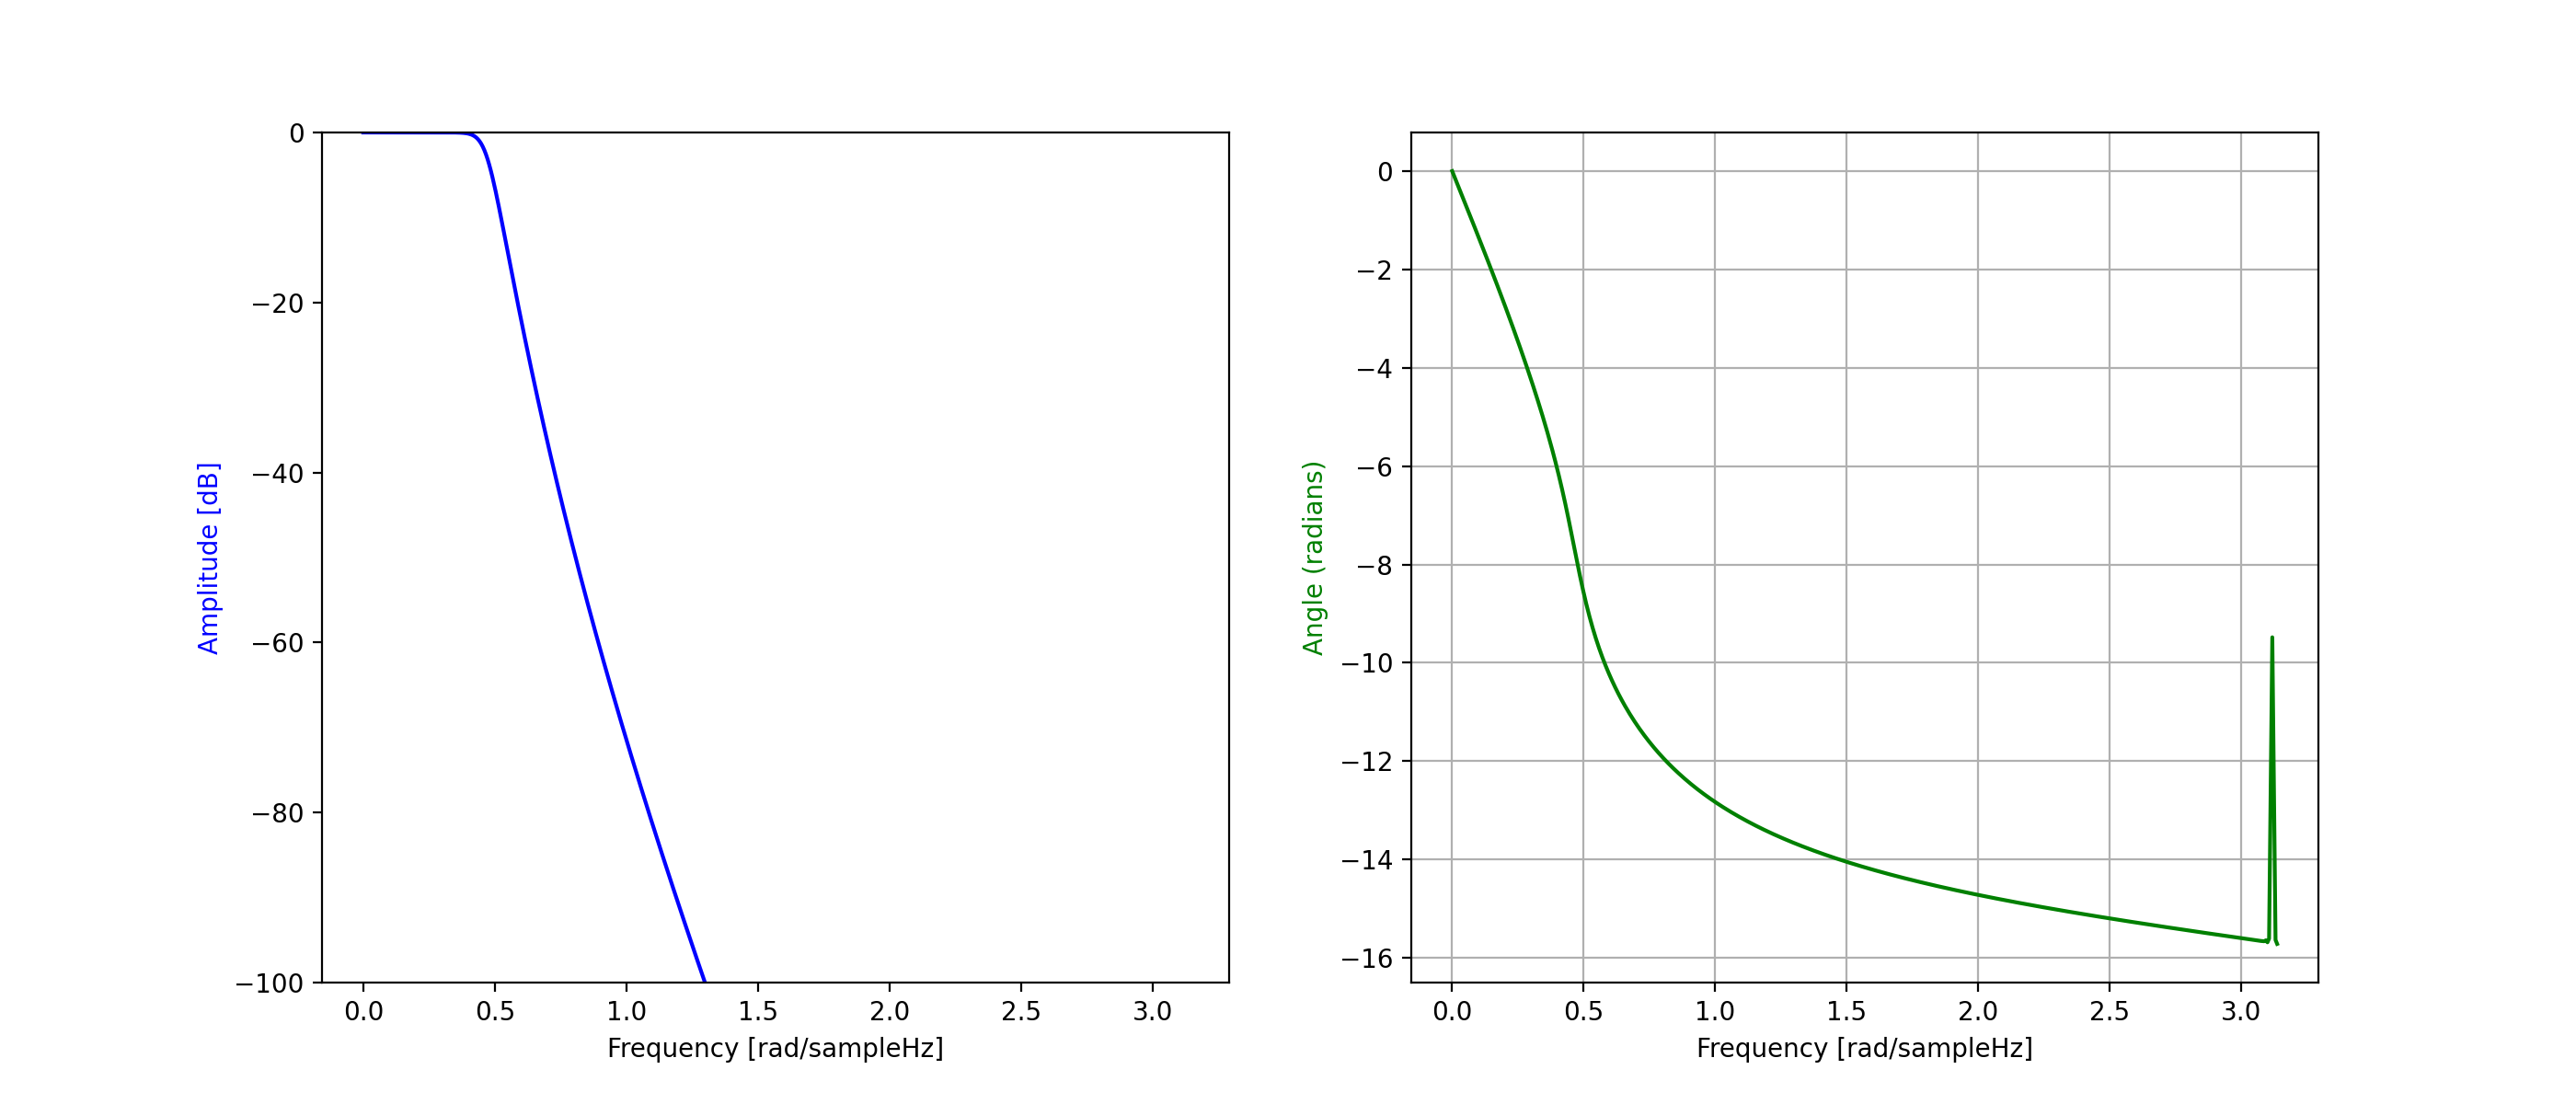

<IPython.core.display.Javascript object>


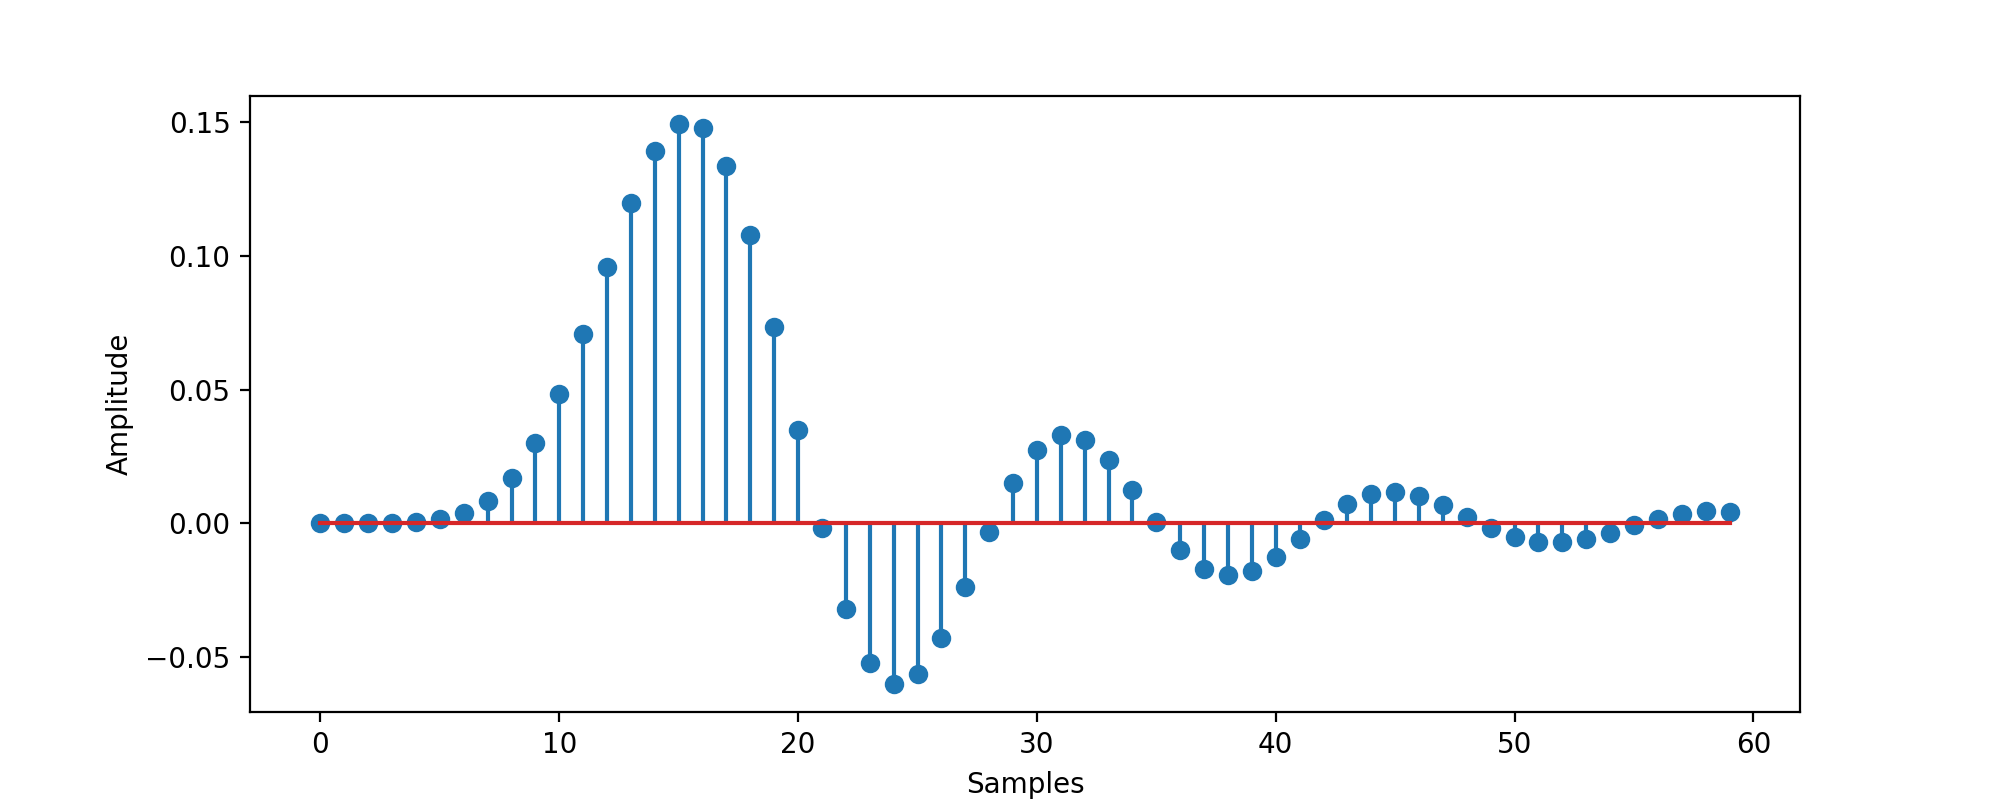

array([ 1.38467082e-07,  2.35247509e-06,  1.95824370e-05,  1.06901175e-04,
        4.32302231e-04,  1.38698034e-03,  3.69159512e-03,  8.41210571e-03,
        1.67983303e-02,  2.99203978e-02,  4.81788658e-02,  7.08510585e-02,
        9.58621290e-02,  1.19918003e-01,  1.39027308e-01,  1.49312064e-01,
        1.47907733e-01,  1.33714640e-01,  1.07795024e-01,  7.33007142e-02,
        3.49368100e-02, -1.91765228e-03, -3.22305984e-02, -5.22508096e-02,
       -6.01553993e-02, -5.62855508e-02, -4.29430462e-02, -2.38170064e-02,
       -3.18417343e-03,  1.49374707e-02,  2.75074563e-02,  3.29218012e-02,
        3.11460266e-02,  2.35292445e-02,  1.23704807e-02,  3.50952513e-04,
       -1.00395160e-02, -1.69672088e-02, -1.95309716e-02, -1.78184002e-02,
       -1.27579888e-02, -5.82256704e-03,  1.33758904e-03,  7.24927370e-03,
        1.08888053e-02,  1.18282053e-02,  1.02420894e-02,  6.79209445e-03,
        2.42824665e-03, -1.84165373e-03, -5.16375896e-03, -6.99063679e-03,
       -7.15141053e-03, -

In [3]:
# Assignment 1 - Different Filter Implementations
from scipy import signal

# Part A
def plot_mag_freq_response(b, a, plot_phase = False, fs = None):
    """
    This function plots the magnitude and phase of the frequency response
    of a filter given the filter coefficients a and b.
    """
    # Getting the frequency response
    w, h = signal.freqz(b, a)

    # Checking if a sampling frequency was provided
    if fs:
        # Convert from rad/sample to Hz
        w = w * fs / (2*np.pi)

    # Plotting the magnitude response
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2 if plot_phase else 1, 1)
    plt.plot(w, 20 * np.log10(abs(h)), 'b')
    plt.ylim([-100, 0])
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [{}Hz]'.format('' if fs else 'rad/sample'))

    if plot_phase:
        # Plotting the phase response on a second subplot
        plt.subplot(1, 2, 2)
        angles = np.unwrap(np.angle(h))
        plt.plot(w, angles, 'g')
        plt.ylabel('Angle (radians)', color='g')
        plt.grid()
        plt.xlabel('Frequency [{}Hz]'.format('' if fs else 'rad/sample'))

    plt.show()

# Part B
def plot_impulse_response(b, a, impulse_response_length):
    """
    This function computes and plots the impulse response of a filter given the
    filter coefficients a and b and a desired impulse response length.
    """
    # Creating the impulse signal
    impulse = np.zeros(impulse_response_length)
    impulse[0] = 1.0

    # Getting the impulse response
    x = signal.lfilter(b, a, impulse)

    # Plotting the impulse response
    plt.figure(figsize=(10, 4))
    plt.stem(x, use_line_collection=True)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    plt.show()

    return x

# Part C

# Defining the cut-off frequency
fc = 0.15

# Designing a lowpass FIR filter using the signal.firwin function
fir_b = signal.firwin(21, fc)

# Designing a lowpass IIR filter using the signal.butter function
iir_b, iir_a = signal.butter(10, fc)

# Plotting the frequency and impulse responses for the FIR filter
print('FIR Filter:')
plot_mag_freq_response(fir_b, [1], True)
plot_impulse_response(fir_b, [1], 60)

# Plotting the frequency and impulse responses for the IIR filter
print('\nIIR Filter:')
plot_mag_freq_response(iir_b, iir_a, True)
plot_impulse_response(iir_b, iir_a, 60)

###  Discussion

 Comment on the differences between the two filters in terms of the magnitude, phase and impulse responses.  What are the tradeoffs associated with these differences?

### Answer

The magnitude response of FIR filters usually has a sharp cutoff and precise control over the filter shape, but it might require a higher order. IIR filters, on the other hand, can have oscillations near the cutoff frequency due to their recursive nature.

Regarding phase response, FIR filters can have a linear phase, preserving waveform shape within the passband, whereas IIR filters generally introduce phase distortion due to their inherent feedback structure.

The impulse response for FIR filters is finite, settling to zero after a certain time. For IIR filters, it theoretically extends to infinity, though in practice, it becomes negligibly small after some time.

The trade-offs lie in complexity versus performance. FIR filters may provide superior performance with phase linearity and precision, but require more computational resources. IIR filters, using fewer coefficients, might introduce phase distortion and ringing at the cutoff frequency. The choice depends on specific application requirements.

## Assignment 2 -- Different Filter Implementations for Smoothing Signals 

In lab 2A, assignment 2, you experimented with smoothing a noisy signal using a moving average window and a convolution. The convolution used an impulse response h[n] that was a causal version of the moving average window. In this problem, you will implement the smoothing function using the both convolution and the signal.lfilter command, to see that they give the same result. This assignment will have three parts, A-C.


**A.**  Using the code from lab 2, create a base time signal and a noisy version of it by adding random noise generated with the numpy.random.randn() function (the standard normal distribution, which is zero mean and unit variance). Plot the original and noisy signals together with the original overlaid on the noisy version, with the time axis labeled assuming a sampling rate of 1000 Hz. Constrain the y-axis to be [0,25] for all plots. Include a legend with the plot.

**B.**  Create one smoothed version of the signal called filtsig1 by using the convolve function from lab 2 with the box impulse response and k=10. Create a second version called filtsig2 by using the signal.lfilter function. Recall that for the FIR filter, the impulse response is equal to the b coefficient vector. Plot the two filtered signals overlaid. Recall that the convolve function will change the length, so you will need to define a new time vector for that. You should find that the two methods give the same result except for edge effects.

**C.**  Use the function that you wrote in assignment 1 to plot the magnitude and phase for the frequency response of this filter. It should look like a low pass filter.


<IPython.core.display.Javascript object>


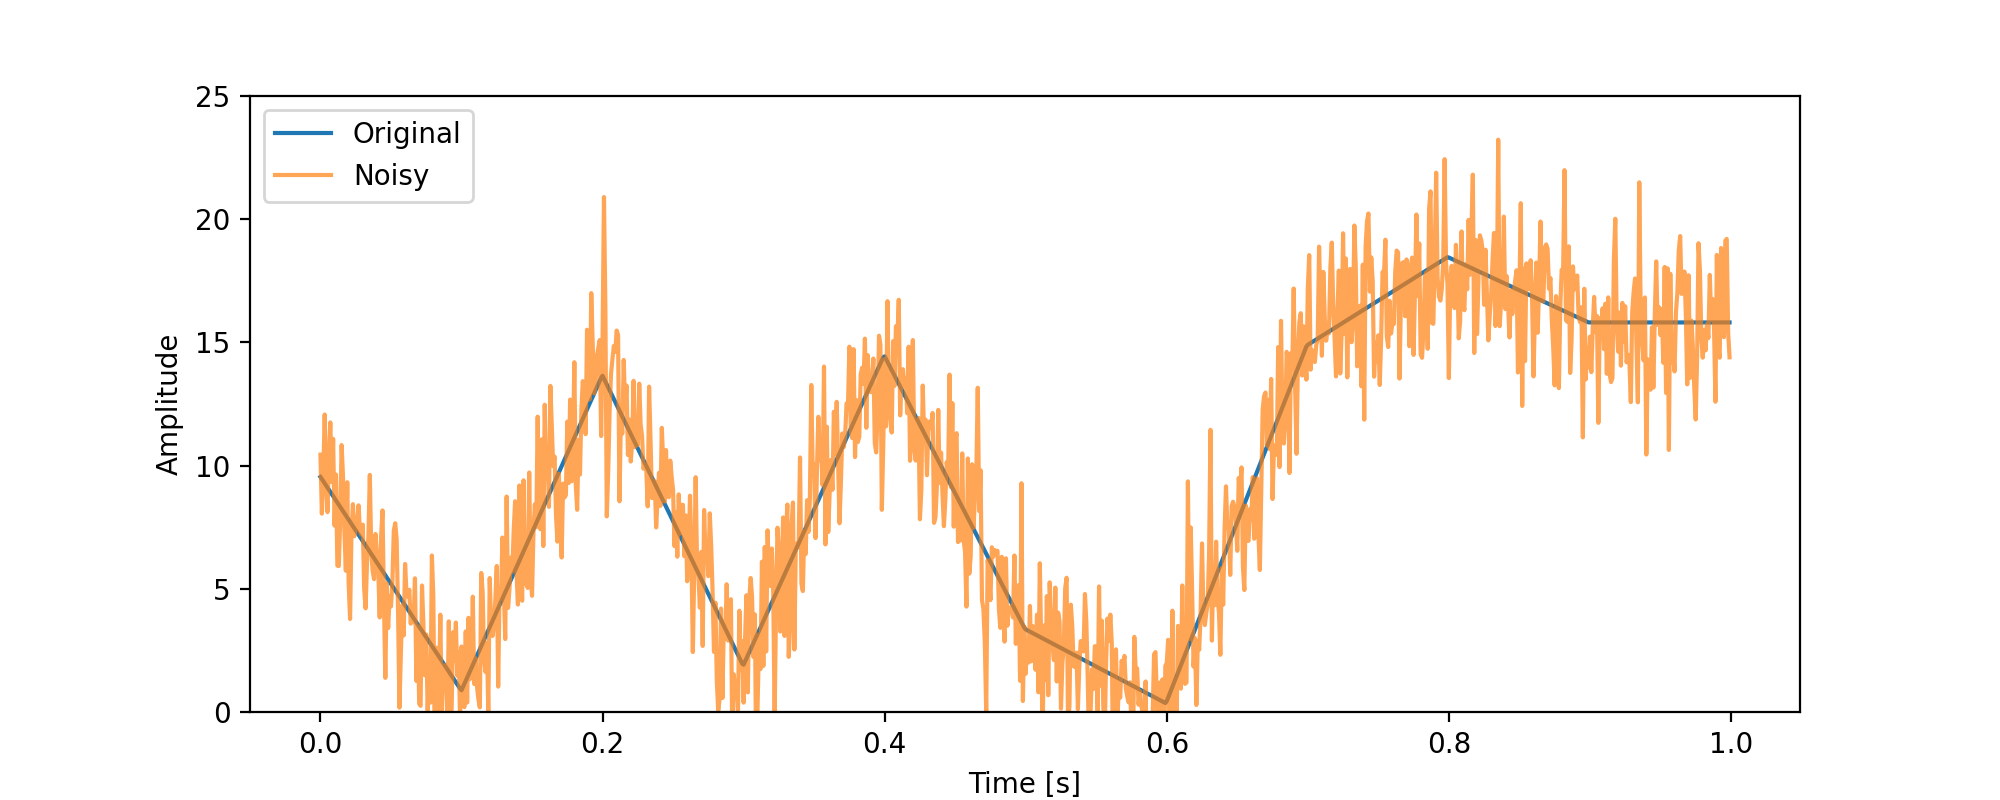

<IPython.core.display.Javascript object>


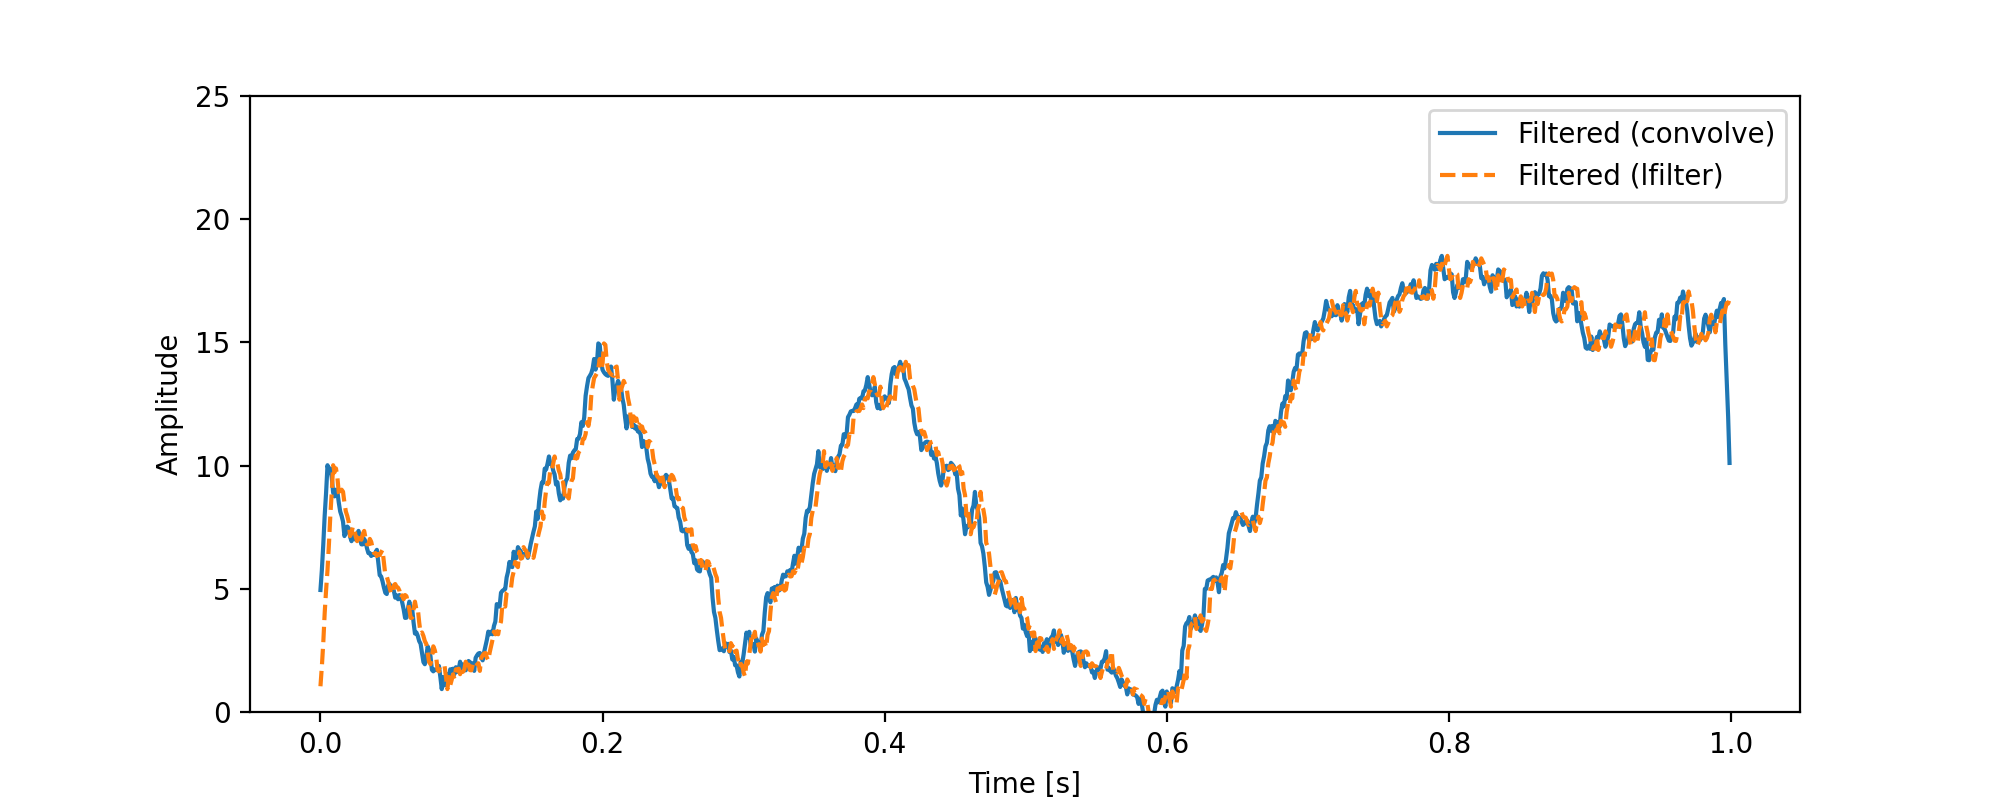

<IPython.core.display.Javascript object>


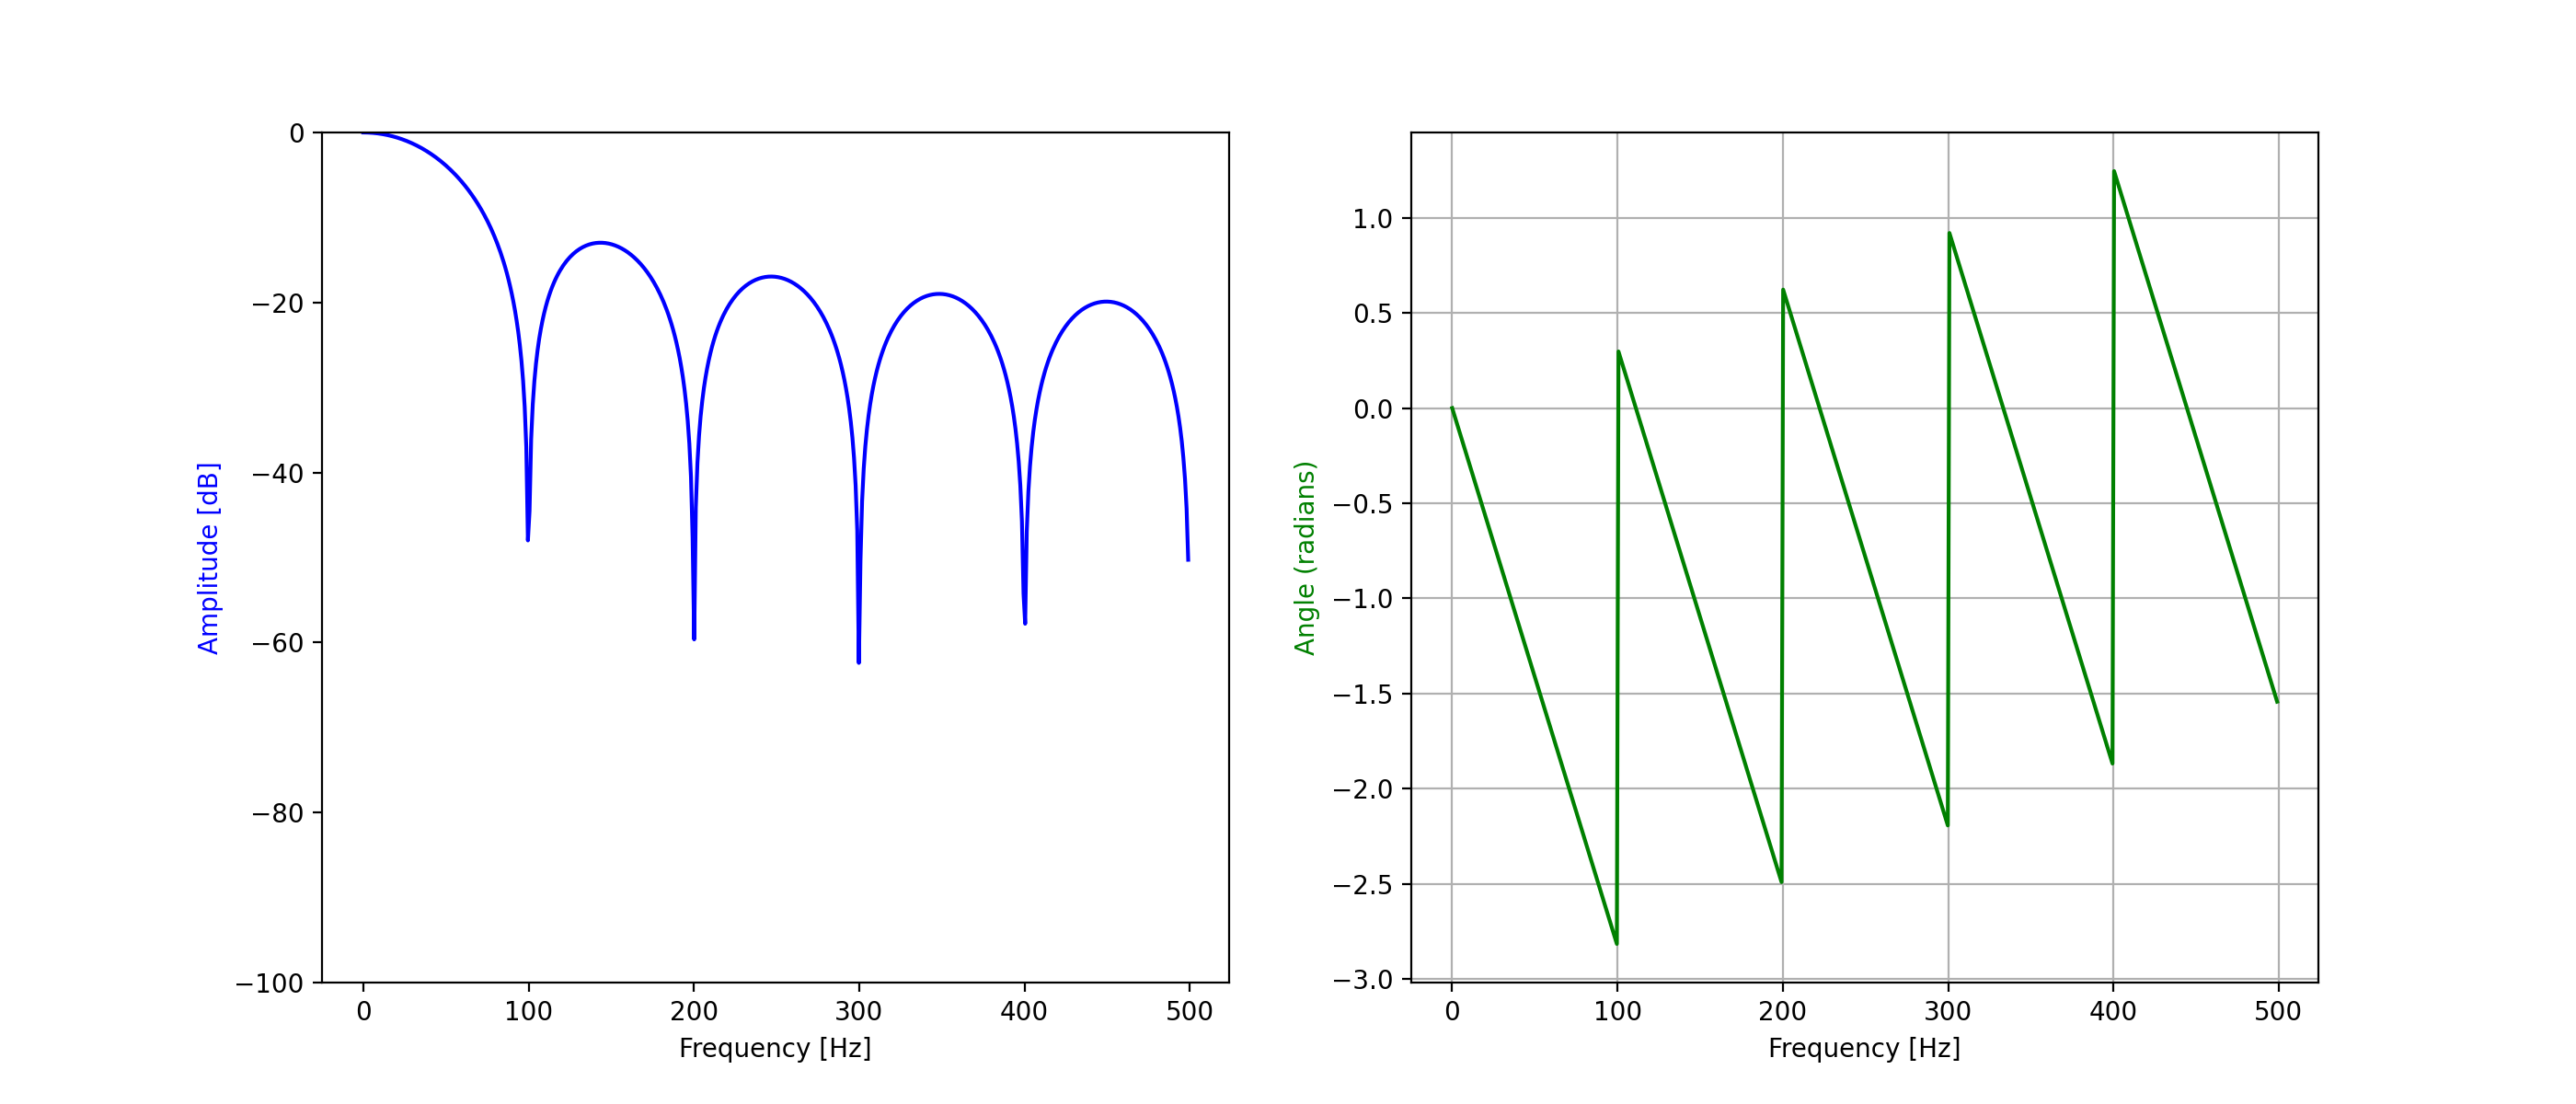

In [4]:
# Assignment 2 - Different Filter Implementations for Smoothing Signals

# Constants
n = 1000  # number of samples
fs = 1000  # sampling rate
k = 10  # filter order for moving average

# Part A
# Create a base time signal and a noisy version of it
t = np.arange(0, n) / fs  # time vector
p = 10  # points for piecewise linear signal
amp = 20  # amplitude range of base signal
base = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * amp)

# Create some random noise to be added to the base signals
noiseamp = 2
noise = noiseamp * np.random.randn(n)
noisy_signal = base + noise

# Plot the original and noisy signals
plt.figure(figsize=(10, 4))
plt.plot(t, base, label='Original')
plt.plot(t, noisy_signal, label='Noisy', alpha=0.7)
plt.ylim([0, 25])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Part B
# Create a box impulse response
h = np.ones(k) / k

# Filter the signal using convolution
filtsig1 = np.convolve(noisy_signal, h, mode='same')

# Filter the signal using lfilter
filtsig2 = signal.lfilter(h, [1.0], noisy_signal)

# Plot the filtered signals
plt.figure(figsize=(10, 4))
plt.plot(t, filtsig1, label='Filtered (convolve)')
plt.plot(t, filtsig2, label='Filtered (lfilter)', linestyle='dashed')
plt.ylim([0, 25])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Part C
# Plot the frequency response of the filter
plot_mag_freq_response(h, [1], True, fs)

###  Discussion

The moving window average (and its causal version) is an FIR filter, so the phase should be linear. How might the result change if you used a Butterworth filter?

### Answer

The moving average filter is a low pass FIR filter with a rectangular frequency response. While it indeed possesses a linear phase response, it lacks sharpness in the frequency cutoff. If we replaced it with a Butterworth filter, which is an IIR filter, we would see a few changes. The Butterworth filter provides a much sharper cutoff in the frequency response, reducing high-frequency noise more effectively. However, the phase response of a Butterworth filter is non-linear, which could result in phase distortions. This trade-off between sharper frequency cutoff and phase distortion is important to consider based on the specific requirements of the application.